In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

#### Dataset
Data obtained from: https://www.kaggle.com/datasets/lnicalo/gtzan-musicspeech-collection?select=speech_wav 

#### Terminologies: 
Frequency (`Hz`)- Differences of Wavelengths (short wavelength = high freq)
Intensity (`db / power`) - Intensity describes the amplitude (height) of the wave 
Sample Rate (`'resoultion of audio file`) - Computer has discrete observations of audio file 

#### Notes

Normalising Audio data [source](https://bioacoustics.stackexchange.com/questions/846/should-we-normalize-audio-before-training-a-ml-model)) -> mean and standard deviation (measured on the training set) to normalise the data. 

In [2]:
# Reading the Data 
audio_files = glob('dataset/*.wav')
music_files = glob('music_wav/*.wav')
speech_files = glob('speech_wav/*.wav')
print(f'Audio Files: {len(audio_files)}, Music Files: {len(music_files)}, Speech Files {len(speech_files)}')


Audio Files: 128, Music Files: 64, Speech Files 64


In [3]:
# play audio file
ipd.Audio(audio_files[0])

## Preliminary Data Exploration

In [4]:
# Obtaining raw data (y (np array)) and sample rate (sr (int value) 
y, sr = librosa.load(audio_files[0]) 

print(f'y: {y[:10]}') 
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 0.14147949  0.11117554  0.08358765  0.06658936  0.04598999  0.02505493
 -0.00735474 -0.03158569 -0.02627563  0.02471924]
shape y: (661500,)
sr: 22050


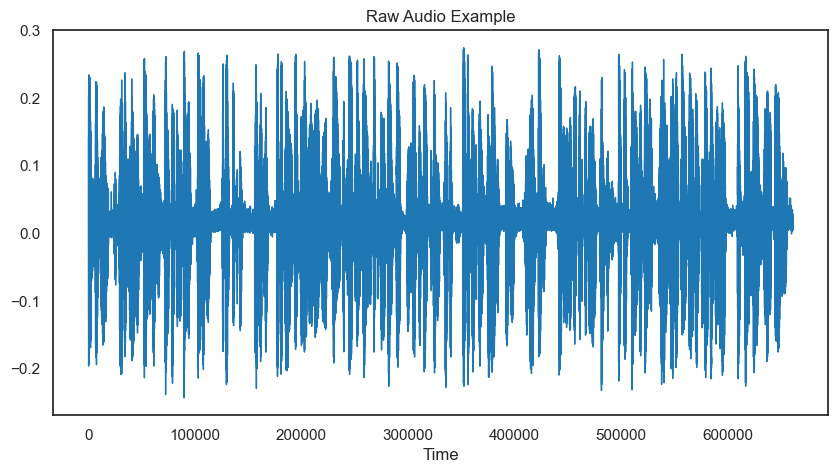

In [5]:
# Plotting Raw Audio Example 
pd.Series(y).plot(figsize=(10,5),
                  lw=1, 
                  title = "Raw Audio Example", 
                  color = color_pal[0])
plt.xlabel("Time")
plt.show()

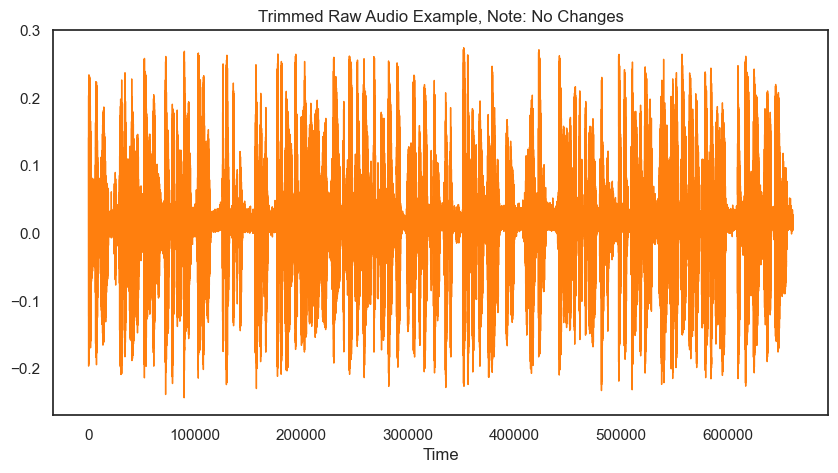

In [6]:
# Trimming Silence in the Audio File 
y_trimmed, _ = librosa.effects.trim(y)

pd.Series(y_trimmed).plot(figsize=(10,5),
                  lw=1, 
                  title = "Trimmed Raw Audio Example, Note: No Changes", 
                  color = color_pal[1])

plt.xlabel("Time")
plt.show()


In [7]:
# Checking for silence in the audio file 
if np.array_equal(y_trimmed, y):
    print("No Silence")
else:
    print("Yes")

No Silence


<Axes: title={'center': 'Raw Audio Zoomed In Example'}>

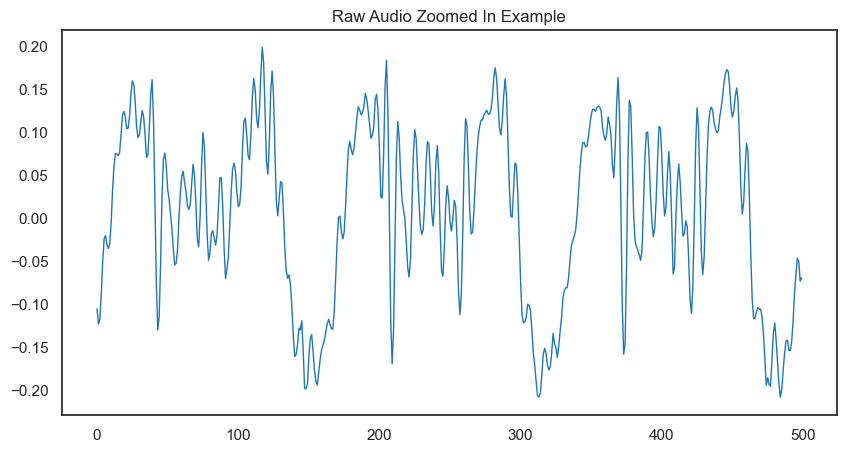

In [8]:
# Zoomed in Audio Data
pd.Series(y[30000:30500]).plot(figsize=(10,5),
                  lw=1, 
                  title = "Raw Audio Zoomed In Example", 
                  color = color_pal[0])

### Spectrogram

In [9]:
D = librosa.stft(y) # Shorttime Fourier Transformation 
# magnitude = np.abs(D)
# frequency = np.linspace(0, sr, len(magnitude)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) # Sound in decibels 

S_db.shape

(1025, 1292)

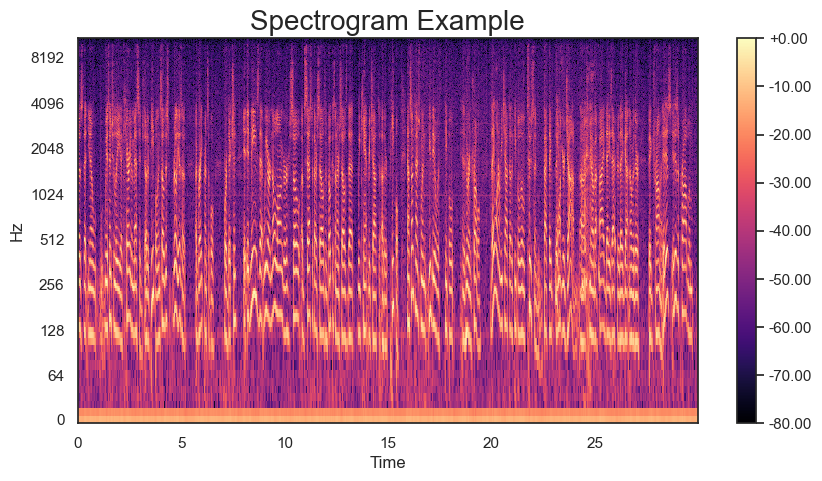

In [10]:
# Plot the transformed audio data

fig, ax = plt.subplots(figsize =(10,5))

img = librosa.display.specshow(S_db, 
                               x_axis = 'time',
                               y_axis = 'log',
                               ax = ax)

ax.set_title("Spectrogram Example", fontsize = 20)
fig.colorbar(img, ax=ax, format=f'%+0.2f')
plt.show()

#### Melodic Spectogram
Using to express frequencies that we can hear in audio 

In [11]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128,)
S_db_mel = librosa.amplitude_to_db(np.abs(S), ref=np.max)

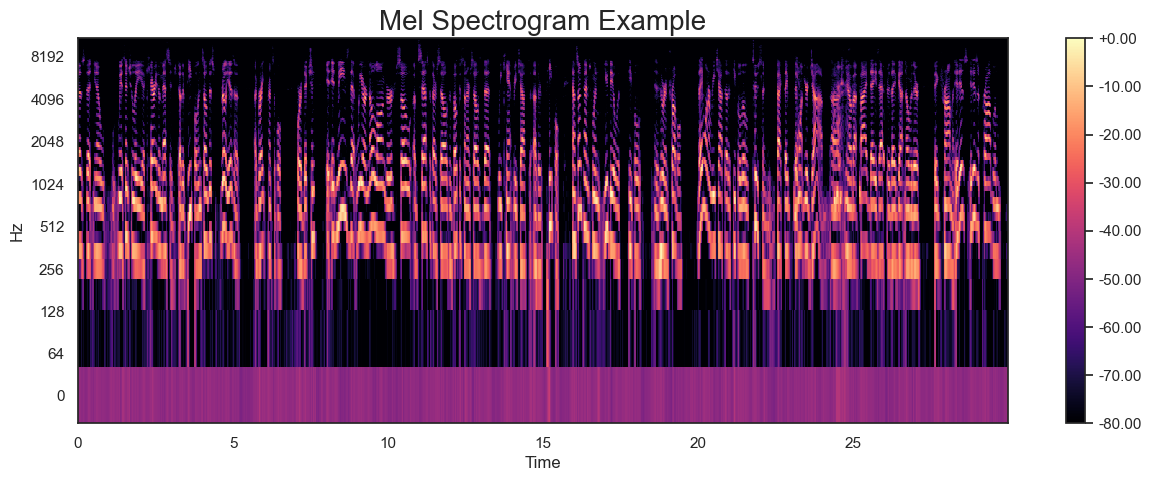

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

# Plot the mel Spectrogram 
img = librosa.display.specshow(S_db_mel, 
                               x_axis = 'time',
                               y_axis = 'log',
                               ax = ax)

ax.set_title("Mel Spectrogram Example", fontsize = 20)
fig.colorbar(img, ax=ax, format=f'%+0.2f')
plt.show()

## Comparing Audio & Speech Files

In [13]:
y_music_ex, sr_music_ex = librosa.load(music_files[0]) 

print(f'y: {y[:10]}') 
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y_speech_ex, sr_speech_ex = librosa.load(speech_files[0]) 

print(f'y: {y[:10]}') 
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 0.14147949  0.11117554  0.08358765  0.06658936  0.04598999  0.02505493
 -0.00735474 -0.03158569 -0.02627563  0.02471924]
shape y: (661500,)
sr: 22050
y: [ 0.14147949  0.11117554  0.08358765  0.06658936  0.04598999  0.02505493
 -0.00735474 -0.03158569 -0.02627563  0.02471924]
shape y: (661500,)
sr: 22050


In [14]:
# Play speech file example
ipd.Audio(speech_files[0])

In [15]:
# Play music file example
ipd.Audio(music_files[0])

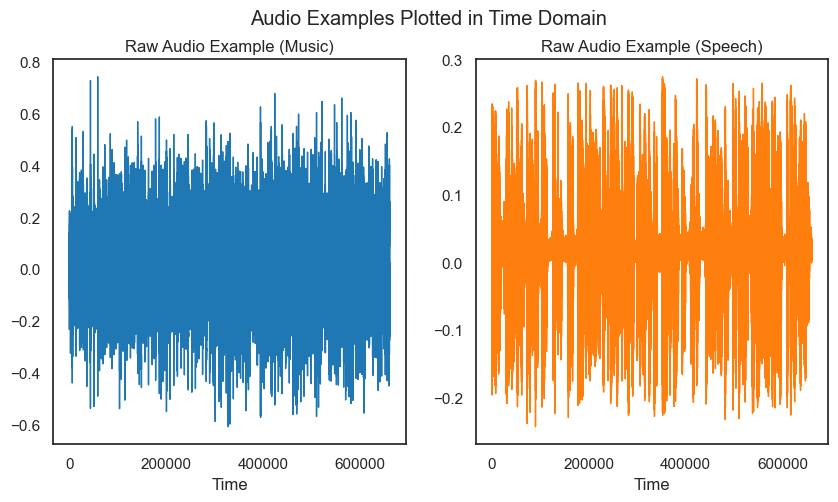

In [16]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle("Audio Examples Plotted in Time Domain") 
pd.Series(y_music_ex).plot(ax=axs[0],
                  lw=1, 
                  title = "Raw Audio Example (Music)", 
                  color = color_pal[0])
axs[0].set_xlabel("Time")
pd.Series(y_speech_ex).plot(ax=axs[1],
                  lw=1, 
                  title = "Raw Audio Example (Speech)", 
                  color = color_pal[1])
axs[1].set_xlabel("Time")
plt.show()

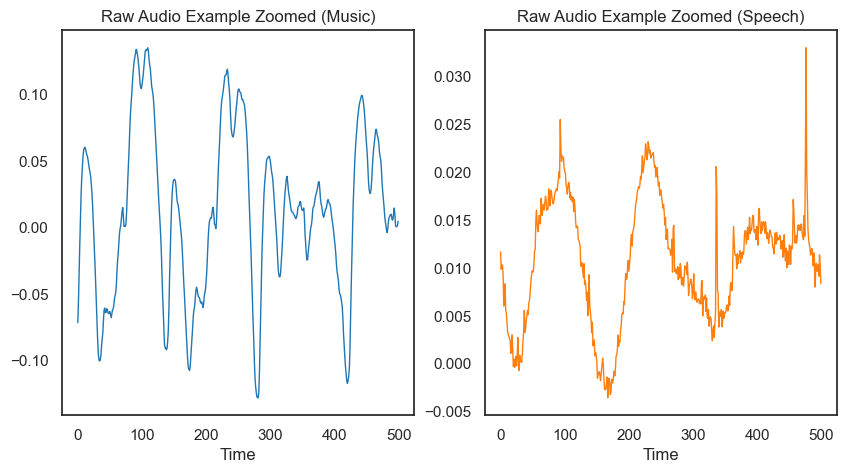

In [17]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

pd.Series(y_music_ex[20000:20500]).plot(ax=axs[0],
                  lw=1, 
                  title = "Raw Audio Example Zoomed (Music)", 
                  color = color_pal[0])
axs[0].set_xlabel("Time")

pd.Series(y_speech_ex[20000:20500]).plot(ax=axs[1],
                  lw=1, 
                  title = "Raw Audio Example Zoomed (Speech)", 
                  color = color_pal[1])
axs[1].set_xlabel("Time")
plt.show()

## Attempt to plot fft on graph

In [18]:

# y_music_ex, sr_music_ex

# fft_music = fft_result = np.fft.fft(y_music_ex)
# # def plot_fft(fft):
# #     fig, ax = plt.subplots(nrows=2, ncols=2,sharex=False, sharey= Truefigsize=(10,5))
# #     fig.suptitle('Fourier Transforms, Audio plotted in Frequency Domain', size = 10)
# #     i = 0
# #     for x in range(2):
# #         for y in range(5):
# #             data = list(fft.values())[i]
# #             Y, freq = data[0], data[1]
# #             ax[x,y].set_titellist(fft.keys())[i]
# #             ax[x,y].plt(freq, Y)
# #             ax[x,y].get_xaxis().set_visible(False)
# #             ax[x,y].get_yaxis().set_visible(False)
# #             i+=1

# #     Y, freq = data[0], data
# fig, ax = plt.subplots(figsize=(15,5))
# for i in fft_music:
#     Y = []
#     Y.append(fft_music[0])

# pd.Series(Y).plot(ax=axs[0],
#                   lw=1, 
#                   title = "Raw Audio Example Zoomed (Music)", 
#                   color = color_pal[0])
# axs[0].set_xlabel("Time")

## Plotting Spectrograms

#### Oberservations
- More intensity in the music spectrogram
- Lots of patterns in the music example (distribution of energy seems similar)
- Lots of activity in low regions of music (due to the baseline in the music audio file)
- Quite stable distribution of energy in the speech example

In [19]:
# Spectrogram plotting method
def plot_spectrogram(y, title = "Spectrogram", y_axis="log",):
    # Fourier Transformation
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max) # decibels is a logarithmic unit to measure sound intensity (log scales are sound intensity)
    plt.figure(figsize=(10,5))
    librosa.display.specshow(S_db,
                             x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+0.2f")
    plt.title(title)
    plt.show()
    

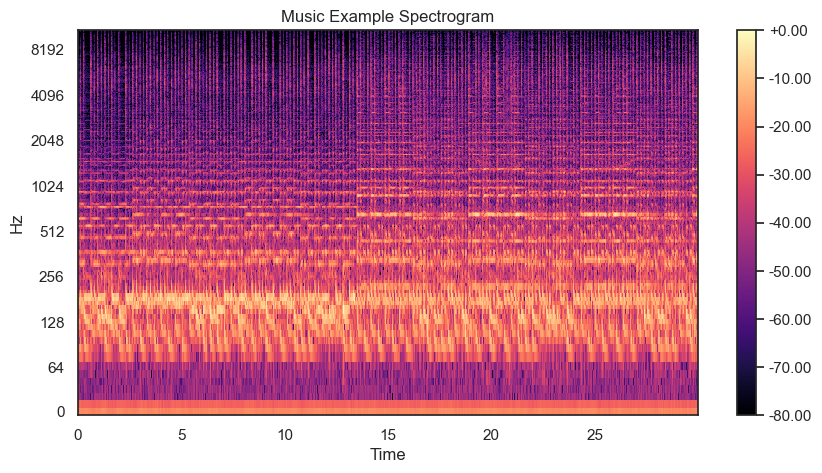

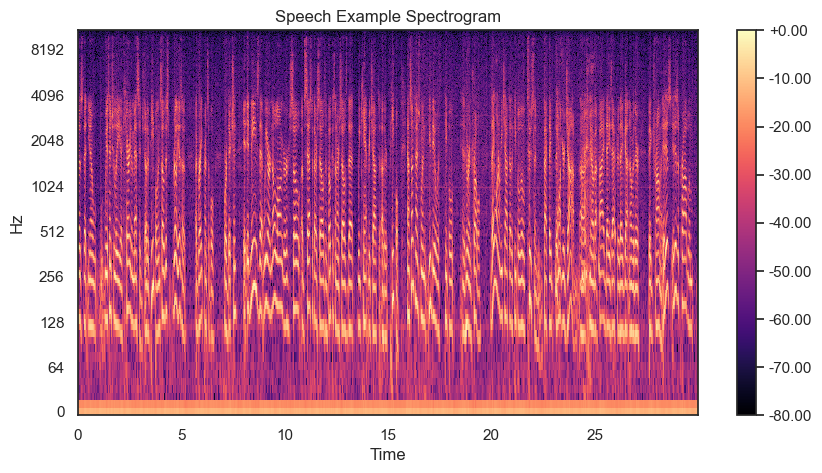

In [20]:
plot_spectrogram(y_music_ex, title="Music Example Spectrogram")
plot_spectrogram(y_speech_ex, title="Speech Example Spectrogram")

## Plotting Mel Spectrograms

In [21]:
def plot_mel_spectrogram(y, sr, n_mels=128, title="Mel Spectrogram", y_axis = 'mel'): # mel bands of 128 was selected, this can be tuned later on 
    S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128,)
    S_db_mel = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    
    fig, ax = plt.subplots(figsize=(15,5))

    # Plot the mel Spectrogram 
    img = librosa.display.specshow(S_db_mel, 
                                   x_axis = 'time',
                                   y_axis = y_axis,
                                   ax = ax)
    
    ax.set_title("Mel Spectrogram Example", fontsize = 20)
    fig.colorbar(img, ax=ax, format=f'%+0.2f')
    plt.title(title)
    plt.show()

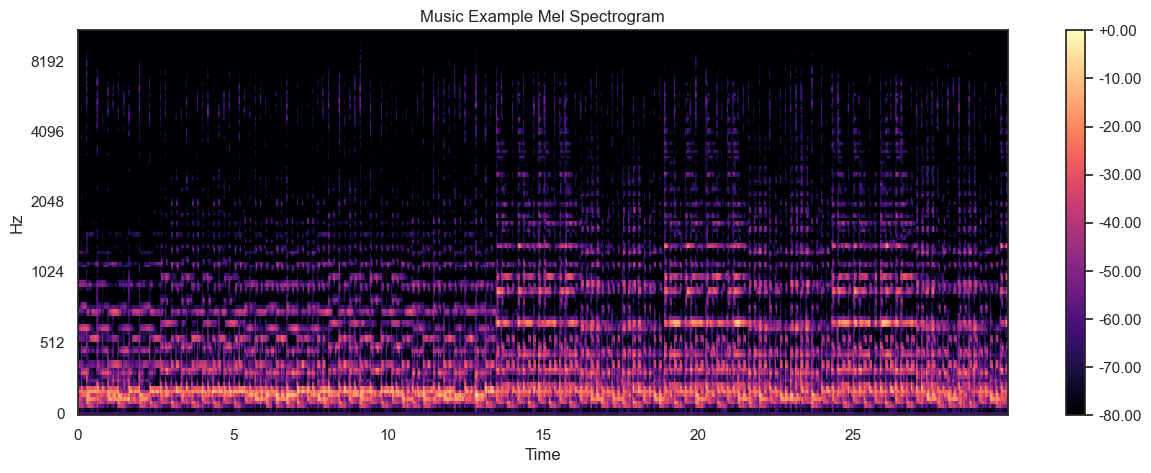

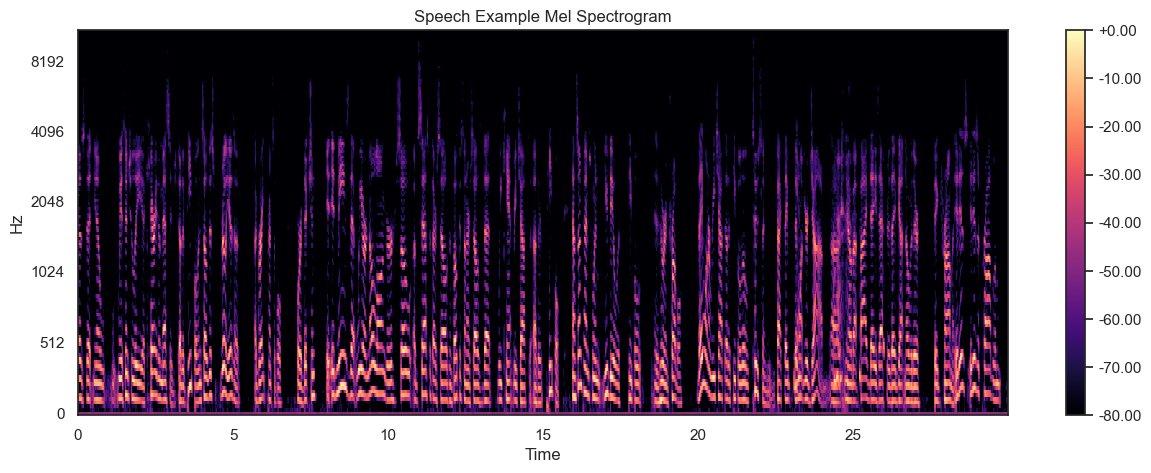

In [22]:
plot_mel_spectrogram(y_music_ex, sr_music_ex, n_mels=128, title="Music Example Mel Spectrogram", y_axis = 'mel')
plot_mel_spectrogram(y_speech_ex, sr_speech_ex, n_mels=128, title="Speech Example Mel Spectrogram", y_axis = 'mel')

## Exploratory Data Analysis

Data Understanding / Breakdown 